In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
sns.set_theme(style="whitegrid")
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
palette = sns.color_palette("husl", 12)

In [7]:
with open('logs/vol_str_True_20.26/dual.pickle', 'rb') as fp:
    scot_dual = pickle.load(fp)

with open('logs/vol_str_True_20.26/sam.pickle', 'rb') as fp:
    scot_f = pickle.load(fp)
    
with open('logs/vol_str_True_20.26/lam.pickle', 'rb') as fp:
    scot_lam = pickle.load(fp)
    
with open('logs/vol_str_True_20.26/cost.pickle', 'rb') as fp:
    scot_c = pickle.load(fp)

with open('logs/vol_str_True_20.26/y_hist.pickle', 'rb') as fp:
    scot_y = pickle.load(fp)

with open('logs/vol_str_True_20.26/x_hist.pickle', 'rb') as fp:
    scot_x = pickle.load(fp)

In [8]:
scot_x.shape

(50, 52)

In [ ]:
np.mean(scot_f[:, -100:]), np.mean(scot_dual[:, -100:])

In [ ]:
scot_f.shape

In [24]:
with open('logs/vol_str_False_22.26/dual.pickle', 'rb') as fp:
    sot_dual = pickle.load(fp)

with open('logs/vol_str_False_22.26/sam.pickle', 'rb') as fp:
    sot_f = pickle.load(fp)
    
with open('logs/vol_str_False_22.26/lam.pickle', 'rb') as fp:
    sot_lam = pickle.load(fp)

with open('logs/vol_str_False_22.26/cost.pickle', 'rb') as fp:
    sot_c = pickle.load(fp)
    
with open('logs/vol_str_False_22.26/y_hist.pickle', 'rb') as fp:
    sot_y = pickle.load(fp)

with open('logs/vol_str_False_22.26/x_hist.pickle', 'rb') as fp:
    sot_x = pickle.load(fp)

In [25]:
sot_x.shape

(50, 52)

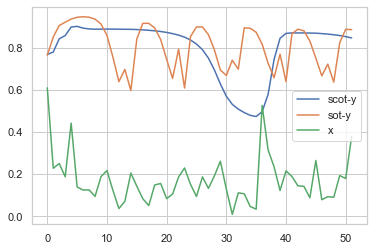

In [46]:
idx = 39
plt.plot(scot_y[idx, :], label='scot-y')
plt.plot(sot_y[idx, :], label='sot-y')
plt.plot(scot_x[idx, :], label='x')
plt.legend(loc='best')
plt.show()

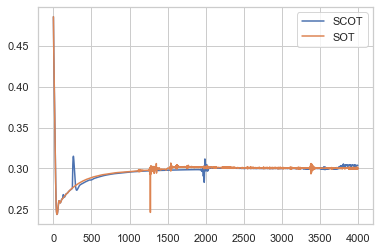

In [47]:
plt.plot(scot_c[40, :], label='SCOT')
plt.plot(sot_c[40, :], label='SOT')
plt.legend(loc='best')
plt.show()

In [48]:
np.mean(sot_f[:, -100:]), np.mean(sot_dual[:, -100:])

(1.9501195, 2.023505)

In [49]:
sot_f.shape

(50, 4000)

In [50]:
with open('logs/vol_ot_18.34/dual.pickle', 'rb') as fp:
    ot_dual = pickle.load(fp)

with open('logs/vol_ot_18.34/sam.pickle', 'rb') as fp:
    ot_f = pickle.load(fp)
    
with open('logs/vol_ot_18.34/lam.pickle', 'rb') as fp:
    ot_lam = pickle.load(fp)

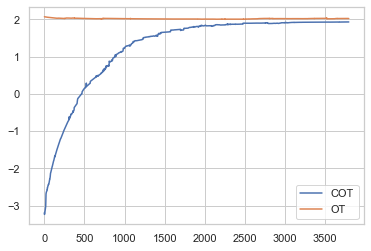

In [53]:
plt.plot(scot_dual.mean(axis=0)[200:], label='COT')
plt.plot(sot_dual.mean(axis=0)[200:], label='OT')
plt.legend(loc='best')
plt.show()

In [57]:
n_ins, n_period = sot_c.shape
n_subp = int(n_period/100)

df = []
for ins in range(n_ins):
    val = sot_f[ins, ::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

for ins in range(n_ins):
    val = scot_f[ins, ::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SCOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

# for ins in range(n_ins):
#     val = ot_f[ins, ::100]
#     df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['OT',]*n_subp, 
#                             'step': np.arange(n_subp)}))
    
df = pd.concat(df)

In [58]:
df = df.reset_index(drop=True)

In [20]:
df

,f,instance,type,step
0,0.405309,0.0,SOT,0
1,0.270943,0.0,SOT,1
2,0.281813,0.0,SOT,2
3,0.288095,0.0,SOT,3
4,0.294160,0.0,SOT,4
...,...,...,...,...
3995,0.298384,49.0,SCOT,35
3996,0.298489,49.0,SCOT,36
3997,0.298257,49.0,SCOT,37
3998,0.298503,49.0,SCOT,38


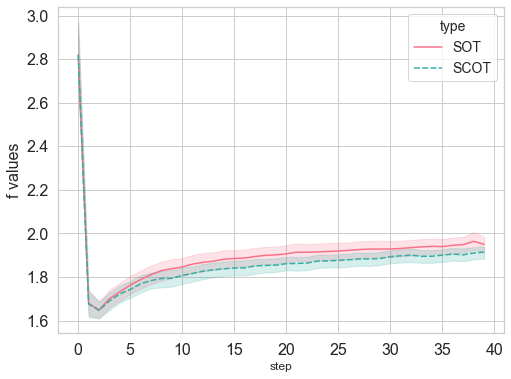

In [59]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 2)
g = sns.lineplot(data=df, x='step', y='f', hue='type', palette=palette, ci=80, style='type')
# plt.xlabel(r'Steps ($10^5$)', fontsize=16)
plt.ylabel('f values', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1, 1), title='type', fontsize=14, title_fontsize=14)
plt.show()
# plt.savefig('Q_oneside.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [60]:
sot_mean = sot_dual[:, -10:].reshape(-1) #.mean(axis=1)
scot_mean = scot_dual[:, -10:].reshape(-1) #.mean(axis=1)
stat, pval = mannwhitneyu(sot_mean, scot_mean, alternative='greater')
pval

0.0009018415275666631

(array([ 1.00000,  2.00000,  37.00000,  0.00000,  6.00000,  1.00000,
         0.00000,  1.00000,  0.00000,  2.00000]),
 array([-0.32411, -0.18286, -0.04160,  0.09965,  0.24090,  0.38216,
         0.52341,  0.66467,  0.80592,  0.94717,  1.08843], dtype=float32),
 <BarContainer object of 10 artists>)

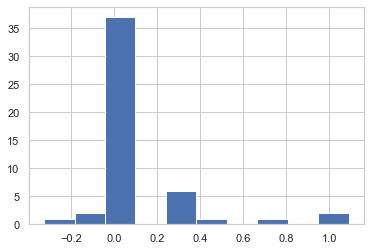

In [67]:
sot_mean = sot_dual[:, -100:].mean(axis=1) #.reshape(-1)
scot_mean = scot_dual[:, -100:].mean(axis=1) # .reshape(-1)
plt.hist((sot_mean - scot_mean).reshape(-1))

In [ ]:
dif = sot_mean - scot_mean
dif[dif<0.25].mean()
# np.mean(sot_mean - scot_mean)

(array([ 11.00000,  95.00000,  252.00000,  287.00000,  169.00000,
         64.00000,  41.00000,  60.00000,  14.00000,  7.00000]),
 array([ 0.02631,  0.03018,  0.03405,  0.03791,  0.04178,  0.04565,
         0.04951,  0.05338,  0.05724,  0.06111,  0.06498], dtype=float32),
 <BarContainer object of 10 artists>)

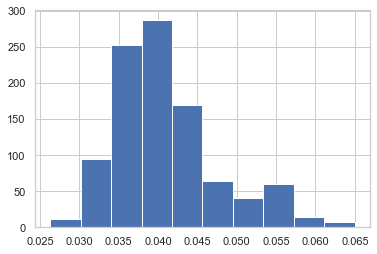

In [80]:
plt.hist(sot_f[:, -1000:].mean(axis=0) - scot_f[:, -1000:].mean(axis=0))

(array([ 7.00000,  8.00000,  10.00000,  14.00000,  20.00000,  17.00000,
         9.00000,  5.00000,  5.00000,  5.00000]),
 array([ 0.29328,  0.29337,  0.29345,  0.29353,  0.29361,  0.29369,
         0.29378,  0.29386,  0.29394,  0.29402,  0.29411], dtype=float32),
 <BarContainer object of 10 artists>)

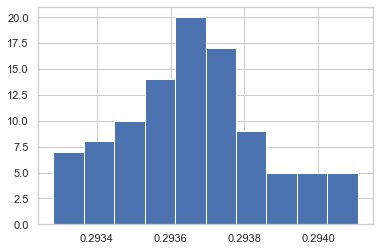

In [77]:
plt.hist(sot_c[:, -100:].mean(axis=0))

In [ ]:
with open('weight.pickle', 'rb') as fp:
    weight = pickle.load(fp)
    
with open('bias.pickle', 'rb') as fp:
    bias = pickle.load(fp)

In [ ]:
x = np.arange(-10, 10, 0.01)
result = np.zeros_like(x)
for k in range(len(x)):
    result[k] = weight.sum()*x[k] + bias

In [ ]:
plt.plot(x, result)

In [ ]:
plt.plot(weight.reshape(-1))